In [1]:
from keras.datasets import reuters

(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64 , activation = 'relu' , input_shape = (10000,)))
model.add(layers.Dense(64 , activation = 'relu' ))
model.add(layers.Dense(46 , activation = 'softmax'))

In [5]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 141us/step - loss: 2.5427 - accuracy: 0.5332 - val_loss: 1.6978 - val_accuracy: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 84us/step - loss: 1.3925 - accuracy: 0.7047 - val_loss: 1.3084 - val_accuracy: 0.7060
Epoch 3/9
7982/7982 [==============================] - 1s 84us/step - loss: 1.0594 - accuracy: 0.7672 - val_loss: 1.1446 - val_accuracy: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 84us/step - loss: 0.8483 - accuracy: 0.8183 - val_loss: 1.0434 - val_accuracy: 0.7640
Epoch 5/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.6825 - accuracy: 0.8538 - val_loss: 0.9689 - val_accuracy: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 84us/step - loss: 0.5546 - accuracy: 0.8814 - val_loss: 0.9404 - val_accuracy: 0.7960
Epoch 7/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.4527 - ac

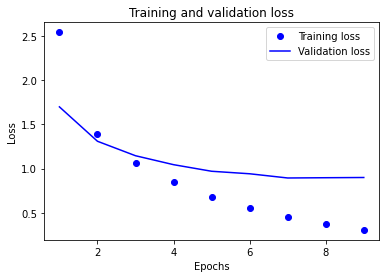

In [8]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(loss) + 1)

plt.plot(epochs , loss , 'bo' , label = 'Training loss' )
plt.plot(epochs , val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()

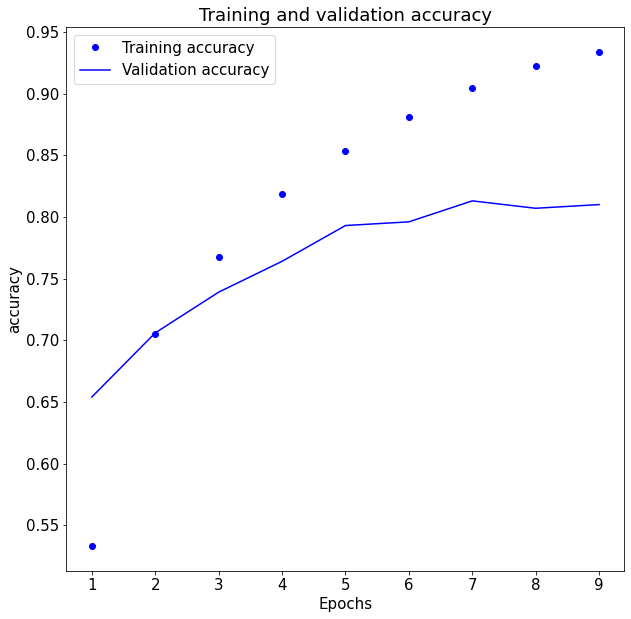

In [9]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc , 'bo' , label = 'Training accuracy' )
plt.plot(epochs , val_acc, 'b' , label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()

In [10]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 68us/step


[1.0114676591443463, 0.7809438705444336]

In [11]:
predictions = model.predict(x_test)
print(predictions[0].shape,'***',
np.sum(predictions[0]),'***',
np.argmax(predictions[0]))

(46,) *** 1.0000001 *** 3
